# Visualizing Swin Transformer

**by Pio Lauren T. Mendoza**

In [10]:
from PIL import Image
from torchinfo import summary

import matplotlib.pyplot as plt
import numpy as np
import requests
import torch 
import torchvision.transforms as T
import timm

device = torch.device("cude" if torch.cuda.is_available() else 'cpu')

print(f"device: {device}")

%load_ext blackcellmagic

device: cpu
The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [4]:
with open("image_net_1k_labels.txt") as f:
    content = f.readlines()

labels = [label.strip("""'"\n""") for label in content]

In [3]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [13]:
model = timm.create_model("swin_base_patch4_window7_224", pretrained=True)
model.eval()
model.to(device);

In [44]:
url = input()

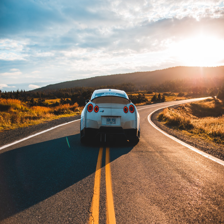

In [45]:
img = Image.open(requests.get(url, stream=True).raw).resize((224,224)).convert('RGB')
img

In [46]:
img_tens = transform(img).unsqueeze(0).to(device)
with torch.no_grad():
  output = model(img_tens)

In [47]:
labels[output.max(-1).indices]

'racer, race car, racing car'